## Import the libraries


In [1]:
!pip install pyunpack
!pip install patool
!pip install py7zr
!pip install sounddevice
!pip install noisereduce
!pip install librosa
! pip install python_speech_features
! pip install tensorflow==2.4
! pip install malaya_speech
! pip install webrtcvad

     |████████████████████████████████| 77 kB 936 kB/s eta 0:00:01
     |████████████████████████████████| 69 kB 891 kB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 5.1 MB/s  eta 0:00:01
     |████████████████████████████████| 357 kB 60.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 56.6 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 59.0 MB/s eta 0:00:01
  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5887 sha256=696c04bfcdfd174a542be838b2fd301e10c4c20a58bc657221b34680bd3c8758
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features
     |████████████████████████████████| 394.7 MB 15 kB/s s eta 0:00:01     |██████████████▋                 | 179.8 MB 61.0 MB/s eta 0:00:04     |████████████████▌               | 204.0 MB 13.0 M

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from py7zr import unpack_7zarchive
import shutil
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np

import librosa
import IPython.display as ipd
from scipy.io import wavfile

import noisereduce as nr
import tensorflow 
from malaya_speech import Pipeline

import malaya_speech
import os

from python_speech_features import mfcc

from sklearn.preprocessing import LabelEncoder
import seaborn as sn

In [3]:
shutil.register_unpack_format('7zip', ['.7z'], unpack_7zarchive)
shutil.unpack_archive('/kaggle/input/tensorflow-speech-recognition-challenge/train.7z', '/kaggle/working/tensorflow-speech-recognition-challenge/train/')

In [4]:
# from pyunpack import Archive
# import shutil
# if not os.path.exists('/kaggle/working/tensorflow-speech-recognition-challenge/train/'):
#     os.makedirs('/kaggle/working/tensorflow-speech-recognition-challenge/train/')
# Archive('/kaggle/input/tensorflow-speech-recognition-challenge/train.7z').extractall('/kaggle/working/tensorflow-speech-recognition-challenge/train/')

#for dirname, _, filenames in os.walk('/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio'):
 #   for filename in filename[:5]:
  #      print(os.path.join(dirname, filename))

# <center> Implementing the Speech Recognition Model in Python
**Dataset used for our Speech Recognition Project**

__You can download the dataset from__ [here](https://www.kaggle.com/c/tensorflow-speech-recognition-challenge).
    
TensorFlow recently released the Speech Commands Datasets. It includes 65,000 one-second long utterances of 30 short words, by thousands of different people. We’ll build a speech recognition system that understands simple spoken commands. <br>    

**Data Exploration and Visualization**

Data Exploration and Visualization helps us to understand the data as well as pre-processing steps in a better way. 

**Visualization of Audio signal in time series domain**

Now, we’ll visualize the audio signal in the time series domain:

In [5]:
train_audio_path = '/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/'

**Accessing each file in data**

In [6]:
#!apt-get install -y p7zip-full
#!7z x ../input/tensorflow-speech-recognition-challenge/train.7z

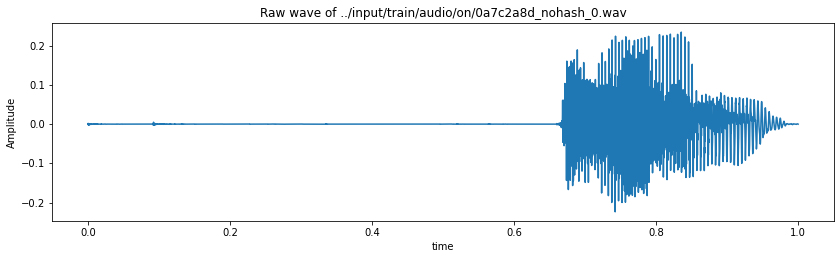

In [7]:
samples, sample_rate = librosa.load(train_audio_path+'on/5a3712c9_nohash_1.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/on/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

**Sampling rate **

Let us now look at the sampling rate of the audio signals

In [8]:
ipd.Audio(samples, rate=sample_rate)

In [9]:
print(sample_rate)
sig1=samples
fs=sample_rate
sr=fs

16000


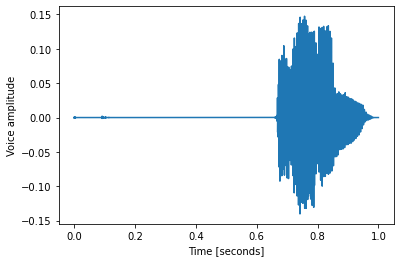

In [10]:
time = np.linspace(0, len(sig1 - 1) / fs, len(sig1 - 1))
reduced_noise1 = nr.reduce_noise(y=sig1, sr=fs,stationary=True)
plt.plot(time, reduced_noise1)  # plot in seconds
#reduced_noise2 = nr.reduce_noise(y=sig2, sr=fs,stationary=True)
#plt.plot(time, reduced_noise2)  # plot in seconds
#plt.title("Voice Signal")
plt.xlabel("Time [seconds]")
plt.ylabel("Voice amplitude")
plt.show()

In [11]:
ipd.Audio(reduced_noise1, rate=sample_rate)

In [12]:
#Silence Removal
vad = malaya_speech.vad.webrtc()
y=reduced_noise1
y_= malaya_speech.resample(y, sr, 16000)
y_ = malaya_speech.astype.float_to_int(y_)
frames = malaya_speech.generator.frames(y, 30, sr)
frames_ = list(malaya_speech.generator.frames(y_, 30, 16000, append_ending_trail = False))
frames_webrtc = [(frames[no], vad(frame)) for no, frame in enumerate(frames_)]
y_ = malaya_speech.combine.without_silent(frames_webrtc)
y_

array([ 5.0185270e-05, -1.5803617e-04,  7.3709284e-06, ...,
        5.8617527e-05,  6.2204075e-05,  6.5274515e-05], dtype=float32)

In [13]:
ipd.Audio(y_, rate = sr )

In [14]:
zero = np.zeros((1*sr-y_.shape[0]))
signal = np.concatenate((y_,zero))
signal.shape
time = np.linspace(0, len(signal - 1) / fs, len(signal - 1))

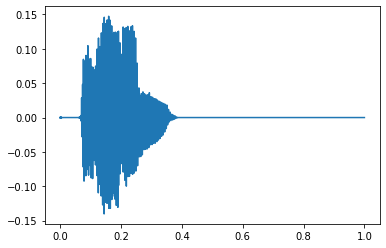

In [15]:
plt.plot(time,signal)

In [16]:
labels=os.listdir(train_audio_path)

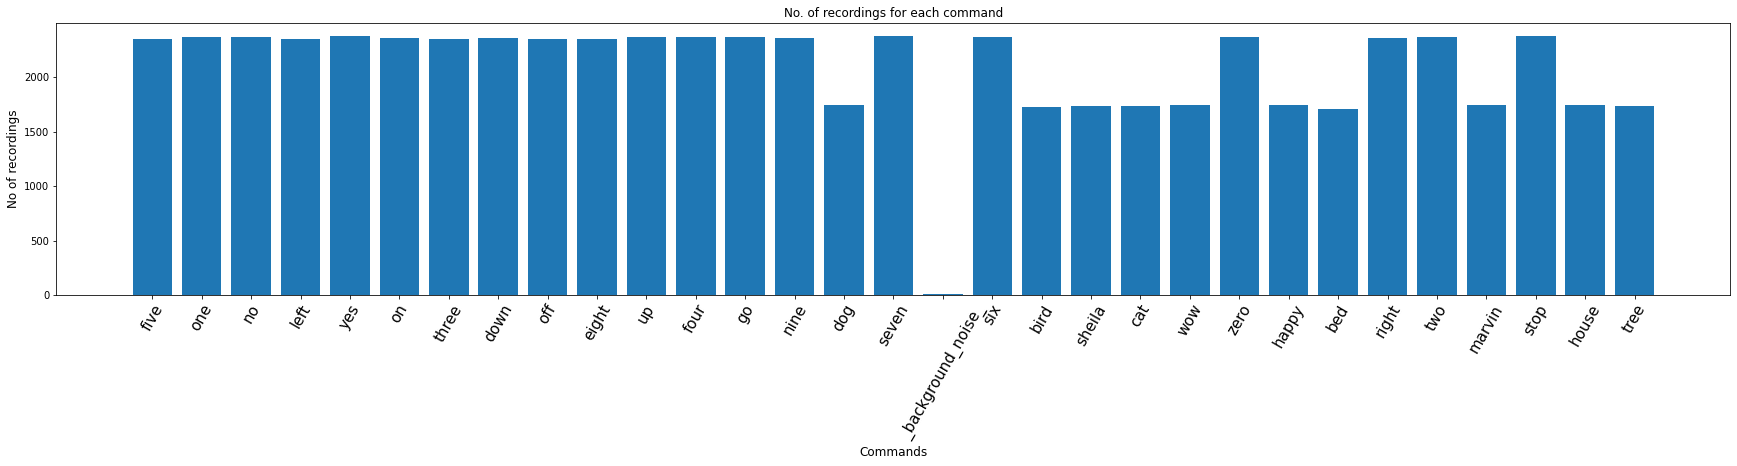

In [17]:
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

## Words used

In [18]:
labels=["on","off","up","down","go","stop","left","right"]

## **Preprocessing the audio waves**

let us read the audio waves and use the below-preprocessing steps :

* Noise Reduction
* Silence Removal
* Extracting MFCCs

Let us define these preprocessing steps in the below code snippet:

In [19]:
sr=16000
vad = malaya_speech.vad.webrtc()
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = nr.reduce_noise(y=samples, sr=sr,stationary=True)
        y_= malaya_speech.resample(samples, sr, 16000)
        y_ = malaya_speech.astype.float_to_int(y_)
        frames = malaya_speech.generator.frames(samples, 30, sr)
        frames_ = list(malaya_speech.generator.frames(y_, 30, 16000, append_ending_trail = False))
        frames_webrtc = [(frames[no], vad(frame)) for no, frame in enumerate(frames_)]
        y_ = malaya_speech.combine.without_silent(frames_webrtc)
        zero = np.zeros(((1*sr+4000)-y_.shape[0]))
        signal = np.concatenate((y_,zero))
        all_wave.append(signal)
        all_label.append(label)

on
off
up
down
go
stop
left
right


(18930, 20000)
(18930,)
on


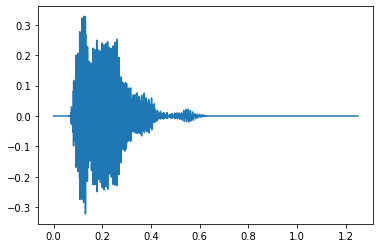

In [20]:
print(np.array(all_wave).shape)
print(np.array(all_label).shape)
time = np.linspace(0, len(signal - 1) / fs, len(signal - 1))
plt.plot(time,np.array(all_wave)[2000,:])
print(np.array(all_label)[2000])
ipd.Audio(np.array(all_wave)[2000,:], rate = sr )

In [21]:
all_mfcc=[]
for wave in all_wave:
    i=0
    mfcc_feat = mfcc(wave , fs, winlen=256/fs, winstep=256/(2*fs), numcep=13, nfilt=26, nfft=256,
                 lowfreq=0, highfreq=fs/2, preemph=0.97, ceplifter=22, appendEnergy=True, winfunc=np.hamming)
    mfcc_feat= np.transpose(mfcc_feat)
    all_mfcc.append(mfcc_feat)
    

In [22]:
print(np.array(all_mfcc).shape)
print(np.array(all_label).shape)
d1=np.array(all_mfcc).shape[1]
d2=np.array(all_mfcc).shape[2]
d=d1*d2
print(d)

(18930, 13, 156)
(18930,)
2028


In [23]:
op_mfcc=np.array(all_mfcc)
op_mfcc=op_mfcc.reshape(np.array(all_mfcc).shape[0],-1)
op_mfcc.shape

(18930, 2028)

In [24]:
#all_label = all_label.tolist()

le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

## **Model based on ANN** 

In [25]:
! pip install --upgrade tensorflow
! pip install --upgrade tensorflow-gpu
! pip install keras==2.3.1

     |████████████████████████████████| 497.5 MB 8.1 MB/s eta 0:00:011     |██████████████████▎             | 283.8 MB 75.7 MB/s eta 0:00:03     |███████████████████▊            | 307.4 MB 36.4 MB/s eta 0:00:067 MB 27.1 MB/s eta 0:00:05     |████████████████████████▏       | 376.2 MB 27.1 MB/s eta 0:00:05     |████████████████████████▎       | 378.1 MB 27.1 MB/s eta 0:00:05     |████████████████████████▋       | 383.3 MB 27.1 MB/s eta 0:00:05MB/s eta 0:00:02     |██████████████████████████▍     | 409.5 MB 54.6 MB/s eta 0:00:02     |██████████████████████████▊     | 415.6 MB 54.6 MB/s eta 0:00:02^C

ERROR: Operation cancelled by user
     |████████�^C█████████▎           | 315.3 MB 58.0 MB/s eta 0:00:04     |███████████                     | 171.4 MB 25.0 MB/s eta 0:00:14
ERROR: Exception:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/opt/conda/lib/pyt

In [26]:
from keras.optimizers import SGD
from keras.constraints import maxnorm
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [27]:
y=tensorflow.keras.utils.to_categorical(y, num_classes=len(labels), dtype='float32')
y.shape

(18930, 8)

In [28]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val= train_test_split(op_mfcc,np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [29]:
print(x_tr.shape)
print(y_tr.shape)
print(x_val.shape)
print(y_val.shape)

(15144, 2028)
(15144, 8)
(3786, 2028)
(3786, 8)


### **Model Architecture**

In [30]:
#Model Architecture
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(d,), kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(80, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax' , kernel_constraint=maxnorm(3)))

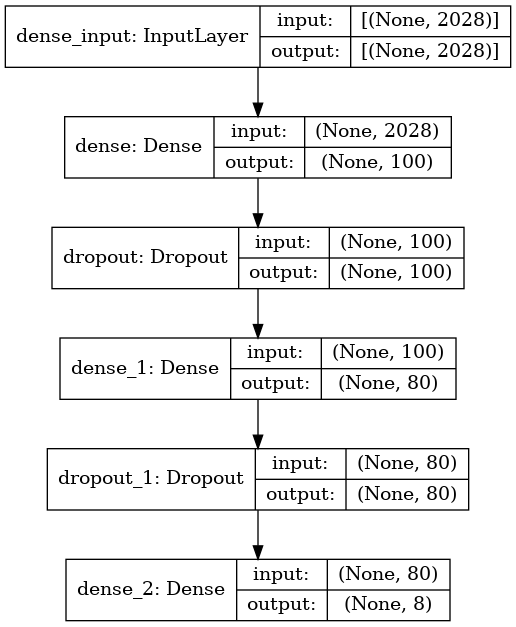

In [31]:
tensorflow.keras.utils.plot_model(model, 'model.png',show_shapes=True)

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='adamax',metrics=['accuracy'])


In [33]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [34]:
#18932
300*65

19500

In [35]:
history=model.fit(x_tr, y_tr,validation_data=(x_val,y_val), epochs=300, batch_size=65)

Epoch 1/300
233/233 [==============================] - 3s 6ms/step - loss: 9.8657 - accuracy: 0.1866 - val_loss: 2.0815 - val_accuracy: 0.2287
Epoch 2/300
233/233 [==============================] - 1s 3ms/step - loss: 2.3275 - accuracy: 0.1625 - val_loss: 2.0163 - val_accuracy: 0.2393
Epoch 3/300
233/233 [==============================] - 1s 3ms/step - loss: 2.1490 - accuracy: 0.1805 - val_loss: 1.9389 - val_accuracy: 0.2586
Epoch 4/300
233/233 [==============================] - 1s 3ms/step - loss: 2.0456 - accuracy: 0.2015 - val_loss: 1.8494 - val_accuracy: 0.2921
Epoch 5/300
233/233 [==============================] - 1s 3ms/step - loss: 1.9680 - accuracy: 0.2300 - val_loss: 1.7409 - val_accuracy: 0.3452
Epoch 6/300
233/233 [==============================] - 1s 3ms/step - loss: 1.8917 - accuracy: 0.2574 - val_loss: 1.6785 - val_accuracy: 0.3793
Epoch 7/300
233/233 [==============================] - 1s 4ms/step - loss: 1.8597 - accuracy: 0.2736 - val_loss: 1.6251 - val_accuracy: 0.3920

In [36]:
train_score = model.evaluate(x_tr, y_tr, batch_size=12)
print(train_score)

print('----------------Training Complete-----------------')

test_score = model.evaluate(x_val, y_val, batch_size = 12)
print(test_score)

1262/1262 [==============================] - 2s 2ms/step - loss: 0.2499 - accuracy: 0.9420
[0.24994389712810516, 0.9420232176780701]
----------------Training Complete-----------------
316/316 [==============================] - 1s 2ms/step - loss: 0.7805 - accuracy: 0.8627
[0.780464768409729, 0.8626518845558167]


In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

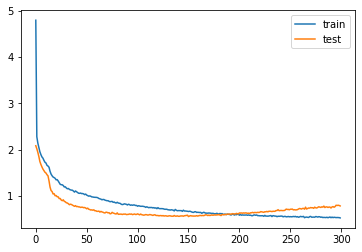

In [38]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

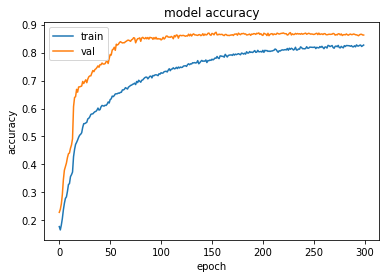

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
y_predict=model.predict(x_val)
conf_mat=tensorflow.math.confusion_matrix(np.argmax(y_val,axis=1) , np.argmax(y_predict,axis=1))

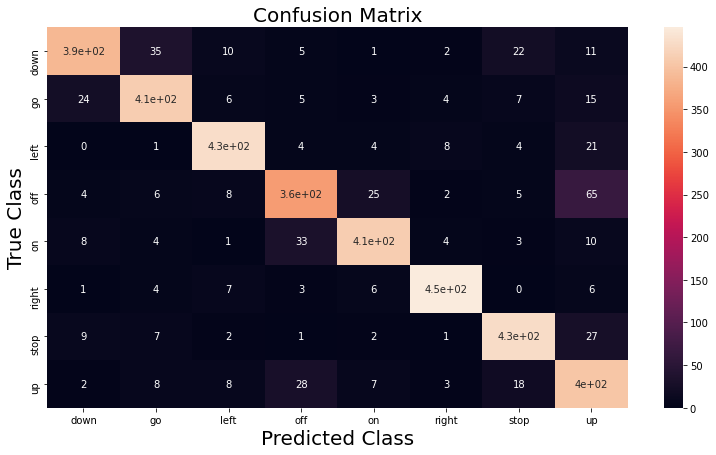

In [41]:
df_cm = pd.DataFrame(np.array(conf_mat), index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (13,7))
ax = sn.heatmap(df_cm, annot=True)
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel("True Class"     , fontsize=20)
plt.xlabel("Predicted Class", fontsize=20)
plt.show()

In [42]:
x_val[1].shape
model.predict(x_val[1].reshape((1,d)))

array([[3.2608282e-02, 2.7503891e-02, 3.5889519e-05, 7.7638174e-07,
        3.8756266e-01, 5.5228412e-01, 4.4328858e-06, 3.4588335e-10]],
      dtype=float32)

Define the function that predicts text for the given audio:

In [43]:
def predict(audio):
    print(samples.shape)
    prob=model.predict(audio)
    index=np.argmax(prob[0])
    return classes[index]

Prediction time! Make predictions on the validation data:

In [51]:
import random
index=random.randint(0,len(x_val)-1)
print(index)
samples=x_val[index]
print("Audio:",classes[np.argmax(y_val[index])])
#ipd.Audio(np.array(all_wave)[index,:], rate=16000)

330
Audio: on


In [52]:
print("Text:",predict(samples.reshape(1,d)))

(2028,)
Text: on


In [46]:
from keras.models import load_model
model.save("8_words.h5")